# Introduction to Linear Regression

## Objectives

- Explain and use the concepts of covariance and correlation
- Explain how to interpret linear regressions
- Use the `statsmodels` library to create a simple linear regression

AKA - Welcome to statistical modeling! Could also say - welcome to **Supervised Machine Learning**.

What do I mean by 'Supervised' ?

![Types of machine learning, broken down](images/machinelearning_supervisedunsupervised.png)
 
[Image Source](https://fr.mathworks.com/help/stats/machine-learning-in-matlab.html)

# First: Some Set Up

## Covariance and Correlation

The idea of _correlation_ is the simple idea that variables often change _together_.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.  For a simple example, cities with more buses tend to have higher populations.

> "Covariance shows you how the two variables _differ_, whereas correlation shows you how the two variables are _related_."
> 
> -- [SimpliLearn: Covariance vs Correlation](https://www.simplilearn.com/covariance-vs-correlation-article)

Recognizing and measuring how variables are related will come up again and again as we begin our journey into statistical modeling!

## Causation

_Why_ does it happen that variables correlate? It _may_ be that one is the cause of the other. A city having a high population, for example, probably does have some causal effect on the number of buses that the city has. But this _need not_ be the case, and that is why statisticians are fond of saying that 'correlation is not causation'. An alternative possibility, for example, is that high values of X and Y are _both_ caused by high values of some third factor Z. The size of children's feet, for example, is correlated with their ability to spell, but this is of course NOT because either is a cause of the other. Rather, BOTH are caused by the natural maturing and development of children. As they get older, both their feet and their spelling abilities grow!

## Statistical Learning Theory

> "The main goal of statistical learning theory is to provide a framework for studying the problem of inference, that is of gaining knowledge, making predictions, making decisions or constructing models from a set of data."
> 
> -- ["Introduction to Statistical Learning Theory"](http://www.econ.upf.edu/~lugosi/mlss_slt.pdf)

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a _function_ of the independent variable(s).

This is the proper interpretation of a statistical _model_.

Here's a simple idea: We could model correlation with a _line_. As one variable changes, so does the other.

This model would have two *parameters*: *slope* and *y-intercept*.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will  be some sort of **error** or **loss** or **residual**. The best-fit line is constructed by minimizing the sum of the squares of these losses.

# Simple Linear Regression

For our first model:

$$ y = m \cdot x + b $$

Here:

- $x$: input column (just one for now)
- $y$: output column (column we're trying to predict)

Solving for the coefficients $m$ and $b$ - our slope and y-intercept - based on the line that 'best' represents the relationship between $x$ and $y$, _assuming_ that relationship is a straight line.

(there are more assumptions too, but we'll get to those later)

#### A Quick Example to Show You The Ropes

As an example, let's say that we assume that overall average temperature across a corn plant's lifespan has an impact on the height of that corn stalk.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in just two columns, temp and height
# Can assume that temp is the average temp across the plant's lifespan (deg F)
# Then height is the height at the time of measurement (cm)
df = pd.read_csv("data/corn.csv", index_col=0)[['temp', 'height']]

print(df.shape)
df.head()

(100, 2)


,temp,height
0,58.086965,122.222368
1,70.582087,110.079666
2,75.868571,256.812528
3,74.732376,167.889601
4,77.384666,188.914312


In [3]:
# we can numerically explore their correlation using pandas
df.corr()

,temp,height
temp,1.000000,0.723216
height,0.723216,1.000000


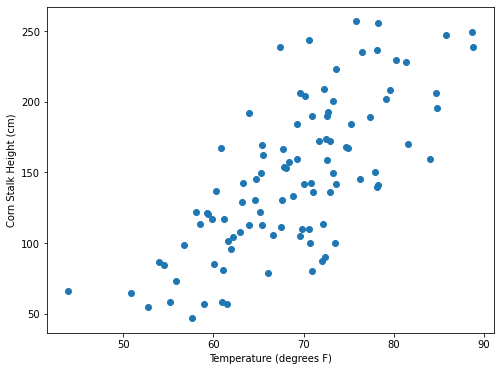

In [4]:
# can use a scatter plot to explore relationship between 2 variables
plt.figure(figsize=(8,6))

plt.scatter(df['temp'], df['height'])
plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.show()

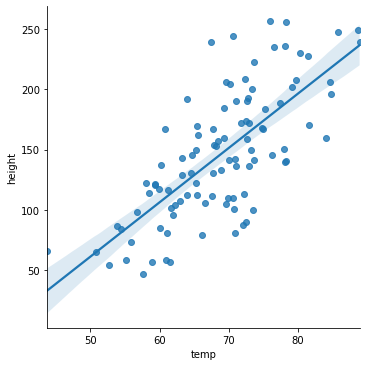

In [5]:
# seaborn even has a 'best fit line' plot
sns.lmplot(x='temp', y='height', data=df)
plt.show()

But what are those parameters found by seaborn above, and how can we solve for them?

## Linear Regression with `statsmodels`


[Check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

Now let's use statsmodels to fit a linear model to our data.

Specifically, we'll use statsmodels' OLS function:

```python
# Create a model of our data
model = sm.OLS(y, X)
# Fit the model to our data
results = model.fit()
# Then we can predict an output by passing in new inputs
y_preds = results.predict(new_X)
```

In [6]:
# First, let's import statsmodels.api as sm
import statsmodels.api as sm

#### Preparing Our Data, then Fitting Our Model

We use capital `X` to capture inputs and lowercase `y` to capture the output:

In [7]:
df

,temp,height
0,58.086965,122.222368
1,70.582087,110.079666
2,75.868571,256.812528
3,74.732376,167.889601
4,77.384666,188.914312
...,...,...
95,73.613956,222.867013
96,72.961203,172.344255
97,60.094637,85.259780
98,65.393612,169.218783


In [8]:
# Grab our data out as X and y variables
X = df['temp']
y = df['height']

In [9]:
# Now let's model!
model_no_intercept = sm.OLS(y, X) # creating our model
# We're doing this specifically without an intercept constant, for the moment

In [11]:
results_no_intercept = model_no_intercept.fit() # actually fitting the model

In [12]:
results_no_intercept.params # seeing our coefficients - just one, since no intercept

temp    2.159828
dtype: float64

#### Making Predictions

We can make up some random points and see where they'd fall on our best fit line! 

AKA - if we had corn stalks that grew at tempeartures measuring 74, 41, or 99 degrees fahrenheit, how tall would we expect them to be (based on our line of best fit)?

In [16]:
results_no_intercept.params[0] * 74

159.8272536410011

In [13]:
random_X = [74, 41, 99]
results_no_intercept.predict(random_X) # predicting for some random possible X values

array([159.82725364,  88.55293783, 213.82294744])

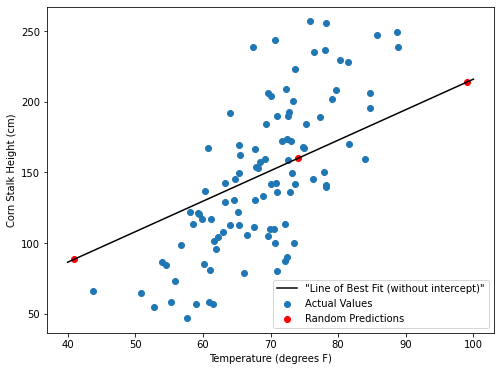

In [17]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(40, 100, 100)
plt.plot(x_pred_range, results_no_intercept.predict(x_pred_range), 
         label='"Line of Best Fit (without intercept)"', color='black')

# Showcasing our random predictions
plt.scatter(random_X, results_no_intercept.predict(random_X), color='red', 
            label='Random Predictions')

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

#### Adding Our Constant - AKA Our Y Intercept

Okay... just one parameter though, a slope - why no intercept? Because statsmodels is weird and assumes you add a constant manually if you want one.

In [18]:
X

0     58.086965
1     70.582087
2     75.868571
3     74.732376
4     77.384666
        ...    
95    73.613956
96    72.961203
97    60.094637
98    65.393612
99    72.598828
Name: temp, Length: 100, dtype: float64

In [24]:
X_with_const = sm.add_constant(X) # easiest way to add the constant, using sm
# pd.DataFrame(X_with_const, columns=['ones', 'temp']).head() # showing the change

/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
X_with_const

,const,temp
0,1.0,58.086965
1,1.0,70.582087
2,1.0,75.868571
3,1.0,74.732376
4,1.0,77.384666
...,...,...
95,1.0,73.613956
96,1.0,72.961203
97,1.0,60.094637
98,1.0,65.393612


In [26]:
# creating a new model
model = sm.OLS(y, X_with_const) # can tell sm there's a constant
results = model.fit()
results.params

const   -165.125394
temp       4.522176
dtype: float64

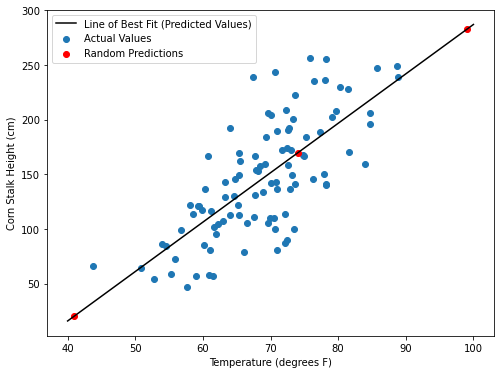

In [27]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, y, label='Actual Values')

# this plots our BETTER line of best fit between 40 and 100
x_pred_range = np.linspace(40, 100, 100)
plt.plot(x_pred_range, results.predict(sm.add_constant(x_pred_range)), 
         label='Line of Best Fit (Predicted Values)', color='black')

# Showcasing our random predictions
plt.scatter(random_X, results.predict(sm.add_constant(random_X)), color='red', 
            label='Random Predictions')
# Notice how our predictions for these points have changed!

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

Neat.

So, uh... how'd we do?

In [28]:
# Check our work
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.94e-17
Time:                        11:01:18   Log-Likelihood:                -502.43
No. Observations:                 100   AIC:                             1009.
Df Residuals:                      98   BIC:                             1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -165.1254     30.261     -5.457      0.000    -225.176    -105.074
temp           4.5222      0.436     10.367      0.000       3.657       5.388
==============================================================================
Omnibus:                        0.633   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.704
Skew:                           0.181   Prob(JB):                        0.703
Kurtosis:                       2.807   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating Our Models - How do we know what's 'best' ?

### Introducing the $R^2$ Score

While there are several ways we'll learn to evaluate our linear regression models, let's start with the **R-Squared** score, aka the **Coefficient of Determination**.

The easiest way to think about an R2 score is that it compares how much more variance in `y` you explain with your model compared to predicting that `y` is always the mean value.

In other words, it compares our fit linear regression model to a much dumber/simpler way we could have predicted our `y` values.

#### Simple Model-less Baseline: Always Predict Our Average Y

If we knew nothing about modeling, we might predict the height of a corn stalk (or whatever our dependent `y` value might be) as the average of all the corn stalk heights that we have in our data.

This is a _baseline model_, specifically what I'll call a really dumb baseline model - without any actual modeling, what is the easiest way to get a really simple prediction?

Let's see what this looks like:

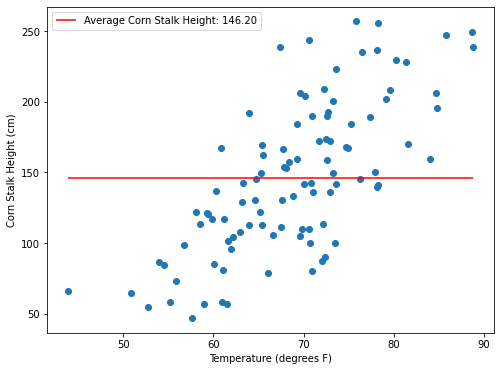

In [29]:
plt.figure(figsize=(8,6))
# this plots the actual data
plt.scatter(X, y)

# Now plotting our average y
plt.hlines(y=y.mean(),
           xmin=X.min(), xmax=X.max(),
           color='red',
           label=f'Average Corn Stalk Height: {df["height"].mean():.2f}')

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

As we can see, predicting the mean for each of these points is not explaining what is going on in the data very well. 

If we were to draw a line between our actual values (blue dots) and our predicted values (here, just our mean value for y every time, our dumb model-less baseline) we could capture and calculate our **errors**

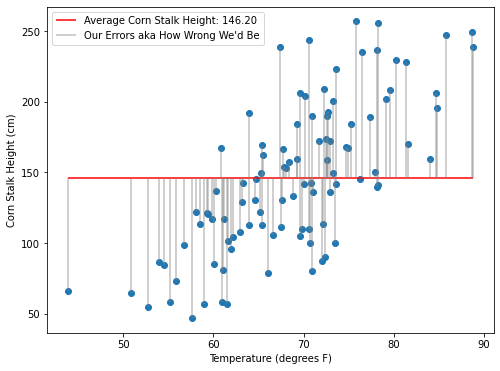

In [30]:
# Let's visualize those errors
plt.figure(figsize=(8,6))
# this plots the actual data
plt.scatter(X, y)

# Now plotting our average y
plt.hlines(y=y.mean(), # aka y_bar
           xmin=X.min(), xmax=X.max(), 
           color='red',
           label=f'Average Corn Stalk Height: {df["height"].mean():.2f}')
# Our errors/residuals are the distances between our actual and our predicted values
plt.vlines(X, y, y.mean(), alpha=.5, color='gray', label="Our Errors aka How Wrong We'd Be")

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

Those gray lines, the difference between the actual value and our average `y` value, have a special term when we sum and square them: that calculation of our error is called the **Total Sum of Squares**

$$\text{Total Sum of Squares} = \sum\limits_{i=1}^{200} (y_{i} - \bar{y})^{2} $$

In [31]:
y_bar = y.mean()

TSS = sum((y - y_bar)**2)

print(TSS)

283830.9675496315


#### Beyond The Baseline

But after we fit a linear regression line we have a better fit than just "mean"

In [32]:
# We can use our model to grab our predicted values for y
# Note that this bypasses needing to add the constant separately!
y_pred = results.predict(sm.add_constant(X))

/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


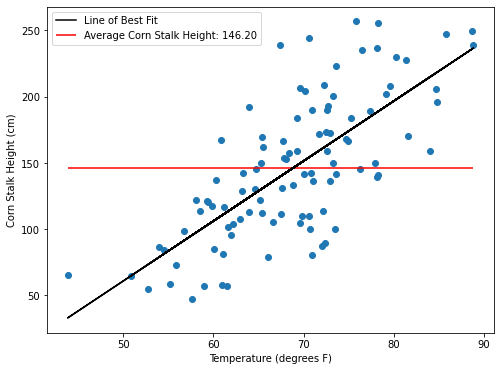

In [35]:
plt.figure(figsize=(8,6))
# this plots the actual data
plt.scatter(X, y)

# this plots the 'best' line
plt.plot(X, y_pred, label="Line of Best Fit", color='black')
# and this plots the 'average' line
plt.hlines(y=y.mean(), 
           xmin=X.min(), xmax=X.max(), 
           color='red',
           label=f'Average Corn Stalk Height: {df["height"].mean():.2f}')

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

As we can see this line is also not 'perfect' from prediction point of view. While our 'line of best fit' is a better fit than just guessing the average for y, there are still error terms - called **residuals**

A **residual** is the difference between the actual value and the predicted value, aka how wrong we are!

And, just like we calculated our Total Sum of Squares to understand how bad our dumb model-less baseline was, we can calculate our **Residual Sum of Squares** to understand how bad our line of best fit was.

$$ \text{Residual Sum of Squares (RSS)} = \sum\limits_{i=1}^{n} (y_i - \text{y_pred}_{i})^{2}$$

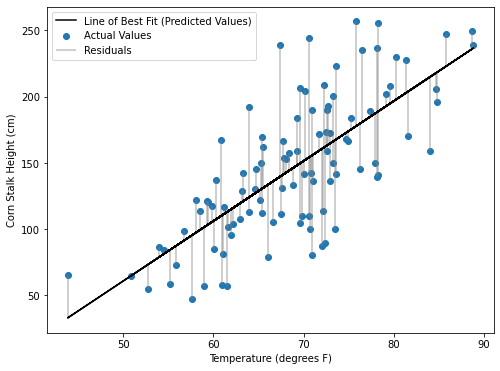

In [36]:
plt.figure(figsize=(8,6))
# this plots the actual data
plt.scatter(X, y, label='Actual Values')

# this plots the 'best' line
plt.plot(X, y_pred, label="Line of Best Fit (Predicted Values)", color='black')

plt.vlines(X, y, y_pred, alpha=.5, color='gray', label='Residuals')

plt.ylabel('Corn Stalk Height (cm)')
plt.xlabel('Temperature (degrees F)')
plt.legend()
plt.show()

In [37]:
# calculate our residuals
residuals = y - y_pred

# now sum the squared residuals
RSS = sum(residuals**2)

RSS

135375.7391941443

In [38]:
print(f'Total Squared Sum is {TSS:.3f}')
print(f'Residual Squared Sum is {RSS:.3f}')

Total Squared Sum is 283830.968
Residual Squared Sum is 135375.739


### Calculating R-Squared

$R^{2}$ is just their ratio:

$$ R^{2} = \frac{TSS - RSS}{TSS} $$

In [39]:
R_squared = (TSS - RSS)/TSS

R_squared

0.5230409832906197

In [40]:
# can grab this straight from our results
results.rsquared

0.5230409832906198

In [41]:
# this is also given in the summary of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.94e-17
Time:                        11:15:23   Log-Likelihood:                -502.43
No. Observations:                 100   AIC:                             1009.
Df Residuals:                      98   BIC:                             1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -165.1254     30.261     -5.457      0.000    -225.176    -105.074
temp           4.5222      0.436     10.367      0.000       3.657       5.388
==============================================================================
Omnibus:                        0.633   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.704
Skew:                           0.181   Prob(JB):                        0.703
Kurtosis:                       2.807   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are three places I want you to look on this summary first, as you're getting used to this output!

1. `R-Squared`
2. `P>|t|`
3. `coef`

#### 1) `R-Squared`

This shows your R2 score, and can tell you at a quick glance how well your model explains the variance in your target variable

#### 2) `P>|t|`

These P-values are calculated by statsmodels, and they tell you how likely it is that the impact the model found between the independent variable (or intercept) and the target is just due to random chance. That's right, we haven't ocmpletely left hypothesis testing in the dust: "The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable." [[Source]](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)

#### 3) `coef`

The coeficient captures the magnitude of the impact of the indepenedent variable on the target. 

We can look at this and, because we know `x1` here is our `temp` variable, we can say: 
> For every 1 degree increase in average temperature (in degrees F) across a corn plant's lifespan, we can expect a 4.5222cm increase in height by the time the corn stalk is fully grown.

Our intercept is a bit different - that tells us what we'd expect our y-variable to measure if our independent variable is equal to zero. But... it's unlikely this is really the relationship - notice that the smallest temperature we have in our data is around 40 degrees F, nowhere close to zero. This is also why you'll hear me call the intercept a **_bias_** term - it's biasing our data, helping it to be a better model where our data actually is - but we should **NEVER** trust a model outside the bounds of our training data!

## SUMMARY: Using `statsmodels`

Let's use a simple dataset built into sklearn to recap what we've done so far:

In [42]:
# Load in our data - note that it's built into this library, so a bit different
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)

# Our X here is a measurement of blood pressure
# Our y is a numeric measure of diabetes progression
X, y = diabetes.data['bp'], diabetes.target

In [45]:
X.describe()

count    4.420000e+02
mean     1.289818e-16
std      4.761905e-02
min     -1.123996e-01
25%     -3.665645e-02
50%     -5.670611e-03
75%      3.564384e-02
max      1.320442e-01
Name: bp, dtype: float64

In [46]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [47]:
# The Process:
# We first construct our model
model = sm.OLS(y, sm.add_constant(X))
# We fit to learn the 'best' coefficients for intercept and slope
results =  model.fit()
# The summary method shows us many relevant statistics
results.summary()

/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.65e-22
Time:                        11:27:25   Log-Likelihood:                -2499.3
No. Observations:                 442   AIC:                             5003.
Df Residuals:                     440   BIC:                             5011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.294     46.185      0.000     145.660     158.607
bp           714.7416     69.252     10.321      0.000     578.636     850.847
==============================================================================
Omnibus:                       10.258   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.969
Skew:                           0.329   Prob(JB):                      0.00684
Kurtosis:                       2.670   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate! How'd we do? What can we learn?

- 


In [48]:
results.params

const    152.133484
bp       714.741644
dtype: float64

In [49]:
# If we want to find the equation for our line, we can look at our params
intercept = results.params[0]
print(f"Y-Intercept: {intercept}")

slope = results.params[1]
print(f"Slope: {slope}")

Y-Intercept: 152.13348416289605
Slope: 714.7416437042883


Note that this prediction is nothing but:

In [50]:
print(f"y = {slope:.3f} * X + {intercept:.3f}")

y = 714.742 * X + 152.133


----

# Level Up: Other Regression Statistics

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.65e-22
Time:                        11:32:15   Log-Likelihood:                -2499.3
No. Observations:                 442   AIC:                             5003.
Df Residuals:                     440   BIC:                             5011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.294     46.185      0.000     145.660     158.607
bp           714.7416     69.252     10.321      0.000     578.636     850.847
==============================================================================
Omnibus:                       10.258   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.969
Skew:                           0.329   Prob(JB):                      0.00684
Kurtosis:                       2.670   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What else do we have in this report?

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; these are statistical measures of how well a model describes our data. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for autocorrelation. We'll return to this topic in a future lecture. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

**Many good regression diagnostics are available in** [`statsmodels`](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html). For more on statsmodels regression statistics, see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate).

# Level Up: `sm.formula.ols()` (aka the lower case version)

There is an alternative way of using `statsmodels` to set up a linear regression, and that is with `sm.formula.ols()`:

In [ ]:
sm.formula.ols(formula="height ~ temp", data=df).fit().summary()

Notice that this way of doing things *automatically sets up an intercept column*.

That's an advantage, but this method has drawbacks inasmuch as the value for the `data` parameter has to have a certain structure. And in fact, once we start using train-test splits, our data will often *fail* to have that requisite structure.

# Level Up: Adjusted $R^2$

There are some theoretical [objections](https://data.library.virginia.edu/is-r-squared-useless/) to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only *increase*! (It could hardly be that with more features I'd be able to account for *less* of the variation in the dependent variable than I could with the smaller set of features.)

One improvement is **adjusted $R^2$**: <br/> $\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

- n is the number of data points; and
- m is the number of predictors.

This can be a better indicator of the quality of a regression model. For more, see [here](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/).

Note that Adjusted $R^2$ *can* be negative!